### Oregon 2013 Monthly Count by Metro Area Figures

Revising figures in a Jupyter Notebook. Jeff would like the exposure series too. I think this would be helpful. 

In [62]:
# load tidyverse library
library(tidyverse)
library(scales)

ERROR: Error in value[[3L]](cond): Package ‘scales’ version 0.5.0.9000 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘scales’ is imported by ‘ggplot2’ so cannot be unloaded



#### ZIP code time-series for each MSA

I need to find the ZIP codes in each MSA to add a time-series plot on MSA. I think the easiest way to find the ZIP codes in each MSA is to find the unique ZIP codes. I'm going to start by importing the SABA case-crossover data frame and finding the ZIP codes in each MSA.

In [2]:
# read saba
path = paste0('../../data/health/or_respiratory_may_to_sep_time_strat_casecross_er.csv')

# read respiratory casecross and find unique zipcodes by MSA values
zip = read_csv(path, col_types = cols(.default = "c")) %>% 
    select(ZIPCODE, MSA) 

Reducing to only unique ZIP and MSA combos.

In [10]:
# unique zip/msa combo
zip_msa = unique(zip)
# check number of zipcodes
nrow(zip_msa)

[1] 377

Importing the population-weighted zipcode estimates of PM<sub>2.5</sub> and assigning MSA to the ZIP code estimate. I'm then going to join to MSA values and limit to exclude ZIP codes not in an MSA.

In [73]:
# read zip pm; join with msa
msa_pm = read_csv('../../data//pm/2013-oregon_zip_pm25.csv', 
                  col_types = cols(ZIPCODE = 'c')) %>% 
    # join with unique MSA vector
    left_join(zip_msa, by = 'ZIPCODE') %>%
    # mutate
    mutate(ZIPCODE = as.factor(ZIPCODE),
        MSA = as.factor(MSA),
        # assign metro name to number
        metroarea = case_when(MSA == 13460 ~ "Bend",
                              MSA == 18700 ~ "Corvallis",
                              MSA == 21660 ~ "Eugene",
                              MSA == 32780 ~ "Medford",
                              MSA == 38900 ~ "Portland",
                              MSA == 41420 ~ "Salem"))  %>% 
    # filter to zips in an MSA only
    filter(!is.na(metroarea)) #%>% 
    # filter to july-sept
    #filter(date >= '2013-07-01' & date <= '2013-09-30')

Checking summary of MSA ZIP population-weighted PM<sub>2.5</sub> values.

In [37]:
# checking pm values in MSA
summary(msa_pm)

    ZIPCODE           date               wrf_f_pm         wrf_nf_pm      
 97002  :   92   Min.   :2013-07-01   Min.   : 0.1294   Min.   : 0.1319  
 97004  :   92   1st Qu.:2013-07-23   1st Qu.: 8.2005   1st Qu.: 6.8273  
 97005  :   92   Median :2013-08-15   Median :14.0751   Median :12.7188  
 97006  :   92   Mean   :2013-08-15   Mean   :16.0417   Mean   :14.5047  
 97007  :   92   3rd Qu.:2013-09-07   3rd Qu.:21.9103   3rd Qu.:20.2292  
 97008  :   92   Max.   :2013-09-30   Max.   :96.6989   Max.   :56.5810  
 (Other):16100                                                           
   wrf_smk_pm         geo_wt_pm          krig_pm        background_pm  
 Min.   : 0.00000   Min.   : -8.528   Min.   :-13.991   Min.   :2.768  
 1st Qu.: 0.01915   1st Qu.:  4.258   1st Qu.:  3.557   1st Qu.:4.066  
 Median : 0.35129   Median :  5.395   Median :  4.733   Median :4.740  
 Mean   : 1.70388   Mean   :  6.407   Mean   :  5.921   Mean   :4.736  
 3rd Qu.: 1.55823   3rd Qu.:  6.870   3rd Qu.:  

Plot of ZIP PM<sub>2.5</sub> by MSA.

In [74]:
# plot of pm by msa
pm_msa_plot = ggplot(data = msa_pm, aes(x = date, y = geo_smk_pm, group = ZIPCODE)) +
    geom_line(color = '#e94057') +
    # facet by metro area
    facet_wrap(~metroarea, ncol = 1) +
    # y label
    ylab(expression(paste("Wildfire Smoke PM"[2.5]," 10µg/m"^3))) +
    # x label
    xlab("Date") +
    theme(panel.background = element_rect(fill = 'white', colour = 'black'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        # strip element
        strip.background = element_rect(colour=NA, fill=NA),
        panel.border = element_rect(fill = NA, color = "black"),
        # facet text size
        strip.text = element_text(size = 10),
        axis.title.y = element_text(angle = 90))

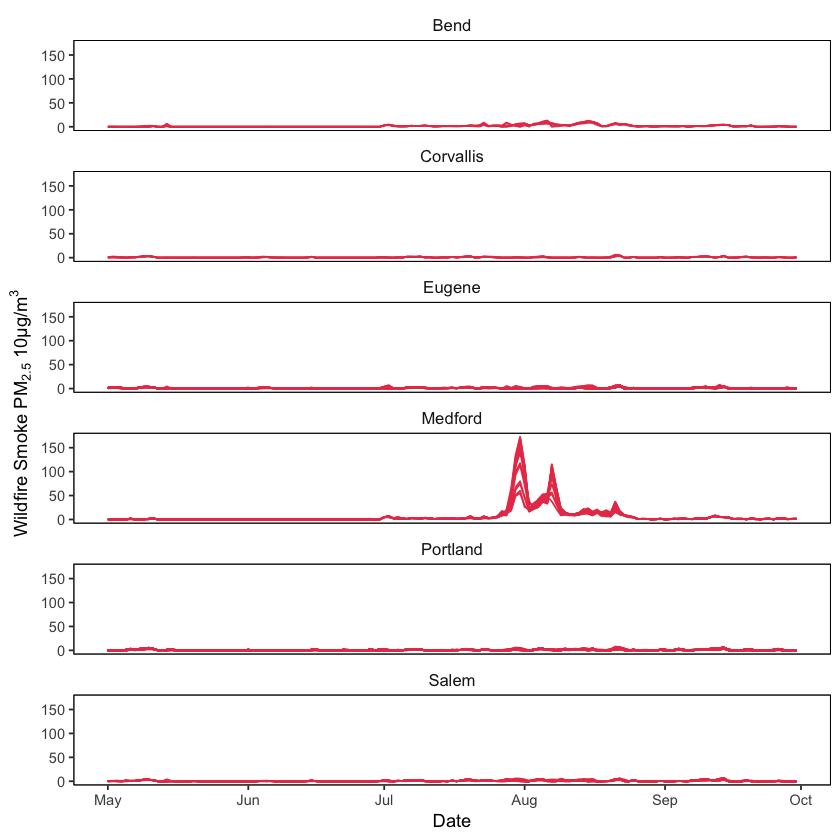

In [75]:
pm_msa_plot

Importing SABA and ED counts/rates by MSA.

In [76]:
# read saba and asthma ed count
saba_count <- read_csv("../../data/health/saba_month_counts.csv") %>% 
    filter(month %in% 5:9) %>% 
    mutate(month_name = factor(month_name, levels = c('May', 'Jun','Jul', 'Aug', 'Sep')))
# read ed count
ed_count <- read_csv("../../data/health/asthma_er_month_counts.csv") %>% 
    filter(month %in% 5:9) %>% 
    mutate(month_name = factor(month_name, levels = c('May', 'Jun','Jul', 'Aug', 'Sep')))

Parsed with column specification:
cols(
  MSA = col_integer(),
  month = col_integer(),
  n_saba = col_integer(),
  NAME = col_character(),
  POPESTIMATE2013 = col_integer(),
  rate = col_double(),
  rate_per1000 = col_double(),
  msa_name = col_character(),
  month_name = col_character()
)
Parsed with column specification:
cols(
  MSA = col_integer(),
  month = col_integer(),
  n_ed = col_integer(),
  NAME = col_character(),
  POPESTIMATE2013 = col_integer(),
  rate = col_double(),
  rate_per10k = col_double(),
  msa_name = col_character(),
  month_name = col_character()
)


In [58]:
summary(saba_count)

      MSA            month       n_saba          NAME          
 Min.   :13460   Min.   :7   Min.   :  468   Length:18         
 1st Qu.:18700   1st Qu.:7   1st Qu.: 1347   Class :character  
 Median :27220   Median :8   Median : 2576   Mode  :character  
 Mean   :27820   Mean   :8   Mean   : 4486                     
 3rd Qu.:38900   3rd Qu.:9   3rd Qu.: 3964                     
 Max.   :41420   Max.   :9   Max.   :17066                     
 POPESTIMATE2013        rate         rate_per1000      msa_name        
 Min.   :  85934   Min.   :0.5446   Min.   : 5.446   Length:18         
 1st Qu.: 165270   1st Qu.:0.6800   1st Qu.: 6.800   Class :character  
 Median : 281098   Median :0.8537   Median : 8.537   Mode  :character  
 Mean   : 586775   Mean   :0.8191   Mean   : 8.191                     
 3rd Qu.: 397963   3rd Qu.:0.9561   3rd Qu.: 9.561                     
 Max.   :2309289   Max.   :1.1034   Max.   :11.034                     
 month_name
 Jul:6     
 Aug:6     
 Sep:6     


Plot of SABA rate.

In [92]:
saba_rate_plot = ggplot(saba_count, aes(x = month_name, 
                                        group = msa_name, fill = msa_name)) +
    geom_bar(aes(weight = rate_per1000), show.legend = F) +
    scale_fill_manual("Metro Area", values = c("#3c1053", "#7f00ff", "#e100ff", 
                                             "#4389a2", "#0ed2f7", "#74ebd5")) +
    facet_wrap(~msa_name, ncol = 1) +
    ylab("SABA Fill Rate per 1,000 Persons") +
    xlab("Metropolitan Statistical Area") +
    theme(panel.background = element_rect(fill = 'white', colour = 'black'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        # strip element
        strip.background = element_rect(colour=NA, fill=NA),
        panel.border = element_rect(fill = NA, color = "black"),
        # facet text size
        strip.text = element_text(size = 10),
        axis.title.y = element_text(angle = 90))

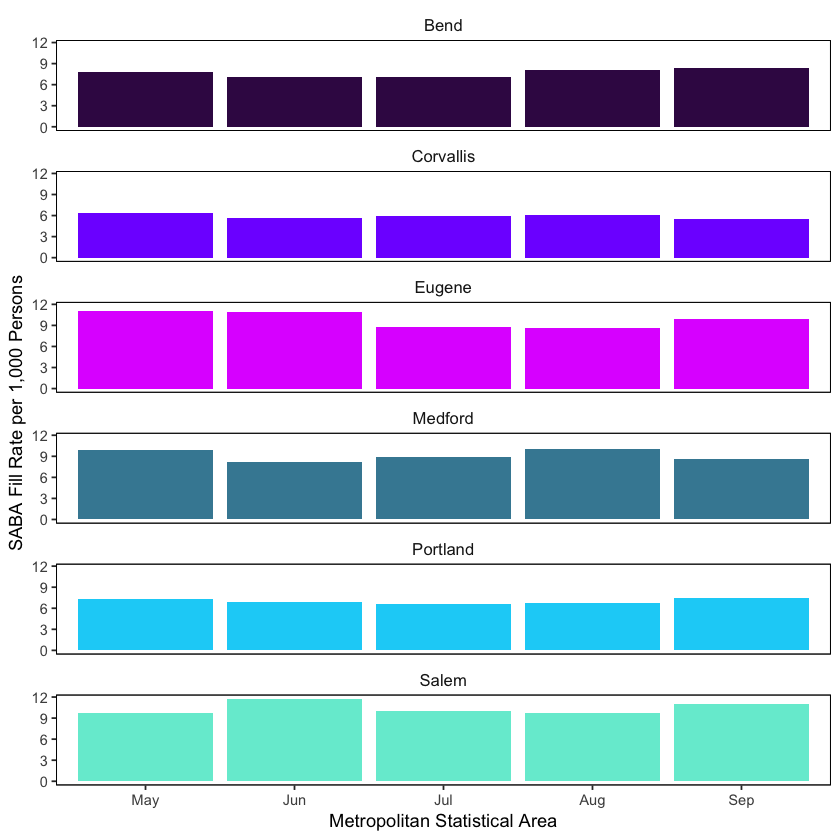

In [93]:
saba_rate_plot

I hate bar charts. The points do not look that much better. If I could do this over, I'd make MSA time-series. That would require a whole new set of analyses.

In [94]:
summary(ed_count)

      MSA            month        n_ed           NAME          
 Min.   :13460   Min.   :5   Min.   :  9.0   Length:30         
 1st Qu.:18700   1st Qu.:6   1st Qu.: 68.5   Class :character  
 Median :27220   Median :7   Median :142.5   Mode  :character  
 Mean   :27820   Mean   :7   Mean   :239.2                     
 3rd Qu.:38900   3rd Qu.:8   3rd Qu.:255.0                     
 Max.   :41420   Max.   :9   Max.   :861.0                     
 POPESTIMATE2013        rate          rate_per10k      msa_name        
 Min.   :  85934   Min.   :0.01047   Min.   :1.047   Length:30         
 1st Qu.: 165270   1st Qu.:0.02978   1st Qu.:2.978   Class :character  
 Median : 281098   Median :0.04583   Median :4.583   Mode  :character  
 Mean   : 586775   Mean   :0.04518   Mean   :4.518                     
 3rd Qu.: 397963   3rd Qu.:0.06452   3rd Qu.:6.452                     
 Max.   :2309289   Max.   :0.08895   Max.   :8.895                     
 month_name
 May:6     
 Jun:6     
 Jul:6     


In [ ]:
ed_rate_plot = ggplot(ed_count, aes(x = month_name, 
                                        group = msa_name, fill = msa_name)) +
    geom_bar(aes(weight = rate_per10k), show.legend = F) +
    scale_fill_manual("Metro Area", values = c("#3c1053", "#7f00ff", "#e100ff", 
                                             "#4389a2", "#0ed2f7", "#74ebd5")) +
    facet_wrap(~msa_name, ncol = 1) +
    ylab("Emergency Room Visits per 10,000 Persons") +
    xlab("Metropolitan Statistical Area") +
    theme(panel.background = element_rect(fill = 'white', colour = 'black'),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        # strip element
        strip.background = element_rect(colour=NA, fill=NA),
        panel.border = element_rect(fill = NA, color = "black"),
        # facet text size
        strip.text = element_text(size = 10),
        axis.title.y = element_text(angle = 90))